## Imports

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle related and Database download

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"airpods69","key":"6f30c3e40880f10e4bd9d237e14b09f8"}'}

In [3]:
!mkdir ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 4.49MB/s]


In [5]:
!unzip heart-disease-dataset.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


## Analysis of DataSet

In [6]:
data = pd.read_csv('heart.csv')

This function returns the first n rows and by default its set to 5

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Return a tuple representing the dimensionality of the DataFrame.

In [8]:
data.shape

(1025, 14)

#### checking for empty coloumns

Getting rid of the NULL values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As you can see no empty coloumns are present and the shape of data is 1025, 14
that is 1025 entries for 14 coloumns

## Model

a logistic regression model has been used from sklearn.linear_model

In [11]:
x1 = data.drop(columns=['target'])
x = x1
y = data.target

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s
where x = features, u = mean, s = standard deviation

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Split arrays or matrices into random train and test subsets and we are keeping 25 percent of data for testing later and the shuffling applied to data before 
splitting is 100.


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=100)

Here we call the logistic regression function.

Note that regularization is applied by default. It can handle both dense and sparse input. 

In [14]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred = log_reg.predict(x_test)

In [16]:
accuracy_score(y_test,y_pred) 

0.8793774319066148

We now build a confusion matrix to calculate the accuracy

In [17]:
confusion_matrix(y_test,y_pred)

array([[ 97,  22],
       [  9, 129]])

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [18]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8749543295579102

F1 Score shows that whether there is overfitting in our model or not. The higher the value of F1 better the result which means there is very less overfitting.

In [19]:
f1_score(y_test,y_pred)

0.8927335640138409

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       119
           1       0.85      0.93      0.89       138

    accuracy                           0.88       257
   macro avg       0.88      0.87      0.88       257
weighted avg       0.88      0.88      0.88       257



We removed this data from the CSV file for demonstration and so the model doesnt uses this for training or testing.

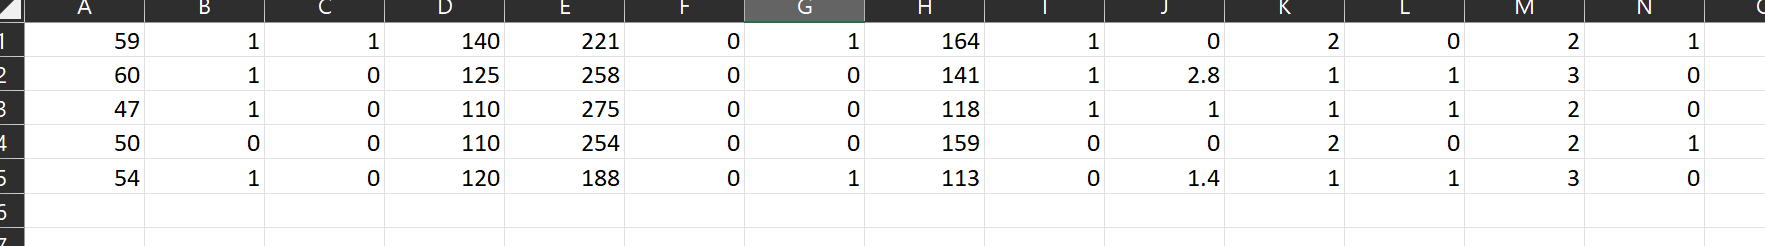

In [25]:
z = ["age",	"sex",	"cp",	"trestbps",	"chol",	"fbs", "restecg",	"thalach",	"exang",	"oldpeak", "slope"	,"ca",	"thal"]
for i in range(len(z)):
  if(z[i] == 'age'):
    print("age in years")
  if(z[i] == 'sex'):
    print("(1 = male; 0 = female)")
  if(z[i] == 'cp'):
    print("chest pain type (4 values) 0,1,2,3")
  if(z[i] == 'trestbps'):
    print("resting blood pressure (in mm Hg on admission to the hospital)")
  if(z[i] == 'chol'):
    print("serum cholestoral in mg/dl")
  if(z[i] == 'fbs'):
    print("(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)")
  if(z[i] == 'restecg'):
    print("resting electrocardiographic results")
  if(z[i] == 'thalach'):
    print("maximum heart rate achieved")
  if(z[i] == 'exang'):
    print("exercise induced angina (1 = yes; 0 = no)")
  if(z[i] == 'oldpeak'):
    print("ST depression induced by exercise relative to rest")
  if(z[i] == 'slope'):
    print("the slope of the peak exercise ST segment")
  if(z[i] == 'ca'):
    print("number of major vessels (0-3) colored by flourosopy")
  if(z[i] == 'thal'):
    print("1 = normal; 2 = fixed defect; 3 = reversable defect")

  

  zi = float(input("Enter {}:".format(z[i])))
  z[i] = zi


k = np.array(z).reshape(1, -1)
k_scaled = scaler.fit(x1)

age in years
Enter age:59
(1 = male; 0 = female)
Enter sex:1
chest pain type (4 values) 0,1,2,3
Enter cp:1
resting blood pressure (in mm Hg on admission to the hospital)
Enter trestbps:140
serum cholestoral in mg/dl
Enter chol:221
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
Enter fbs:0
resting electrocardiographic results
Enter restecg:1
maximum heart rate achieved
Enter thalach:164
exercise induced angina (1 = yes; 0 = no)
Enter exang:1
ST depression induced by exercise relative to rest
Enter oldpeak:0
the slope of the peak exercise ST segment
Enter slope:2
number of major vessels (0-3) colored by flourosopy
Enter ca:0
1 = normal; 2 = fixed defect; 3 = reversable defect
Enter thal:2


In [22]:
ok = scaler.transform(k)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
if(log_reg.predict(ok)):
  print('Disease')
else:
  print('No Disease')

Disease
